In [1]:
# modify speedy boundary conditions to make meridionally symettric aquaplanet with ice poles.
from datetime import datetime

from pyspeedy import Speedy
from pyspeedy.callbacks import ModelCheckpoint, XarrayExporter

import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from cartopy.feature import OCEAN

from cartopy.util import add_cyclic_point

import xarray as xr
from scipy.integrate import cumtrapz
import ctypes
import math
import cmocean as ocm

In [2]:
bc_land = xr.open_dataset("bc/example_bc.nc", engine='netcdf4')
bc_ssta = xr.open_dataset("bc/sst_anomaly.nc", engine='netcdf4')


In [3]:
bc_land

<xarray.Dataset>
Dimensions:  (lat: 48, lon: 96, time: 12)
Coordinates:
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 1981-12-01
Data variables:
    orog     (lon, lat) float32 ...
    lsm      (lon, lat) float32 ...
    vegh     (lon, lat) float32 ...
    alb      (lon, lat) float32 ...
    vegl     (lon, lat) float32 ...
    stl      (lon, lat, time) float32 ...
    snowd    (lon, lat, time) float32 ...
    swl1     (lon, lat, time) float32 ...
    swl2     (lon, lat, time) float32 ...
    swl3     (lon, lat, time) float32 ...
    icec     (lon, lat, time) float32 ...
    sst      (lon, lat, time) float32 ...
Attributes:
    grid_type:    gaussian
    Conventions:  CF-1.5
    comment:      Example boundary conditions file constructed using the data...

In [4]:
bc_ssta

<xarray.Dataset>
Dimensions:  (lat: 48, lon: 96, time: 420)
Coordinates:
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2013-12-01
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
Data variables:
    ssta     (lon, lat, time) float32 ...
Attributes:
    grid_type:    gaussian
    Conventions:  CF-1.5
    comment:      Example SST anomalies file distributed in the SPEEDY.f90 pr...

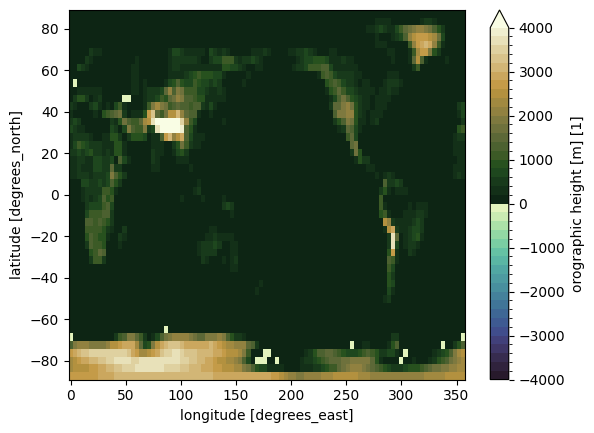

In [5]:
llevs = np.linspace(-4000,4000,41)
bc_land.orog.T.plot.pcolormesh(levels=llevs, cmap=ocm.cm.topo)

In [6]:
orog_new = bc_land.orog.copy()

In [7]:
# fill orog_new xarray dataarry with zeros
orog_new[:,:] = 0

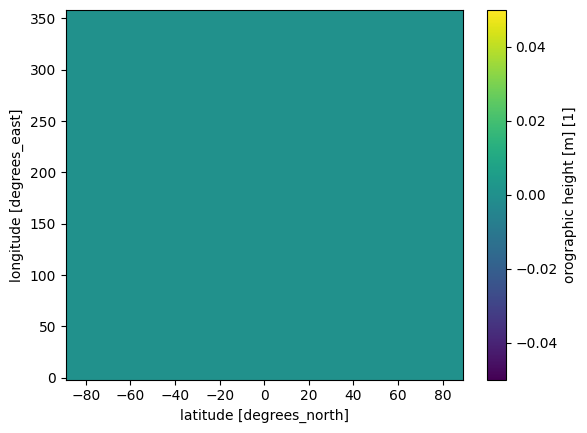

In [8]:
orog_new.plot()

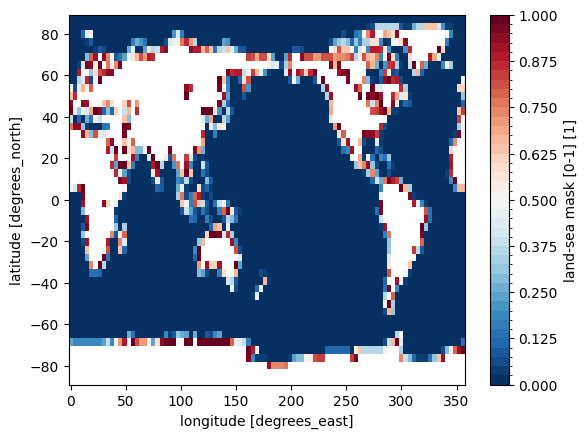

In [9]:
lmlevs = np.linspace(0,1,41)
bc_land.lsm.T.plot.pcolormesh(levels=lmlevs, cmap=plt.cm.RdBu_r)

In [10]:
lsm_new = bc_land.lsm.copy()
lsm_new[:,:] = 0.0
#lsm_new[:,0:5] = 1.0
#lsm_new[:,-5:96] = 1.0


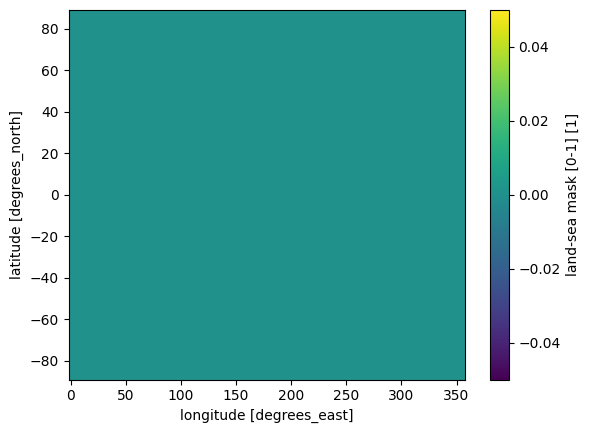

In [11]:
lsm_new.T.plot()

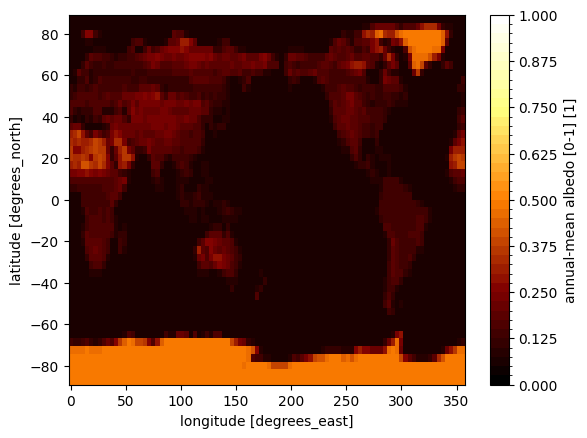

In [12]:
alevs = np.linspace(0,1,41)
bc_land.alb.T.plot.pcolormesh(levels=alevs, cmap=plt.cm.afmhot)

In [13]:
alb_new = bc_land.alb.copy()
alb_new[:,:] = 0.2


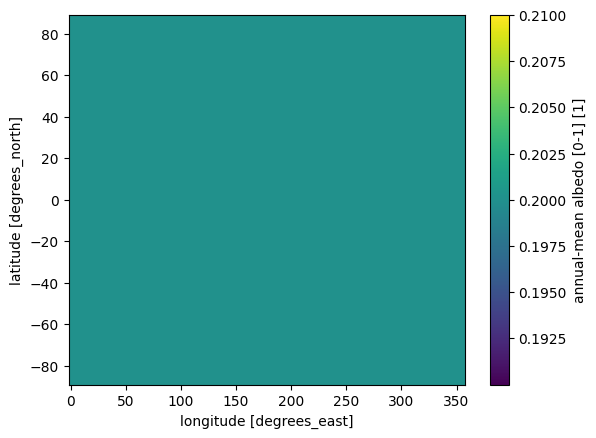

In [14]:
alb_new.T.plot()

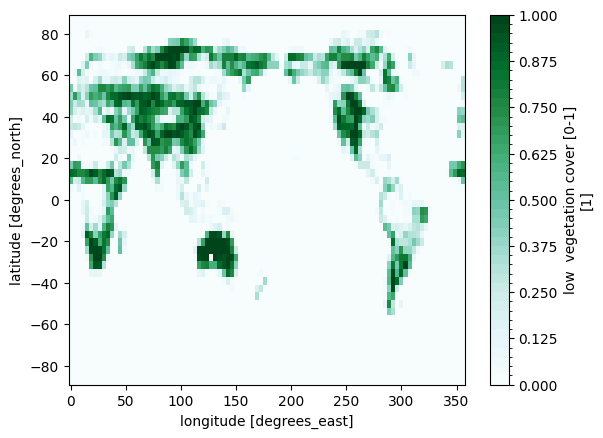

In [15]:
vlevs = np.linspace(0,1,41)
bc_land.vegl.T.plot.pcolormesh(levels=vlevs, cmap=plt.cm.BuGn)

In [16]:
vegl_new = bc_land.vegl.copy()
vegl_new[:,:] = 0.0
vegh_new = bc_land.vegh.copy()
vegh_new[:,:] = 0.0


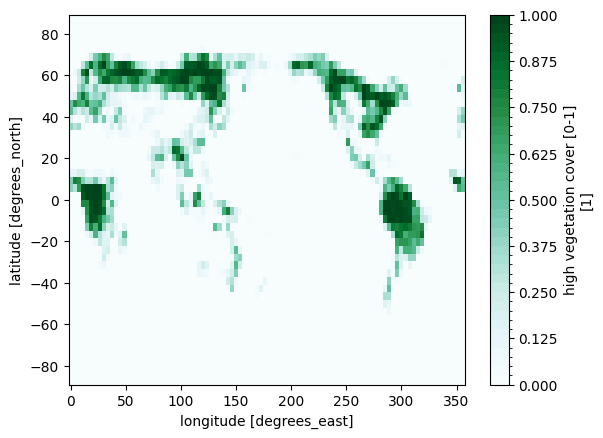

In [17]:
vlevs = np.linspace(0,1,41)
bc_land.vegh.T.plot.pcolormesh(levels=vlevs, cmap=plt.cm.BuGn)

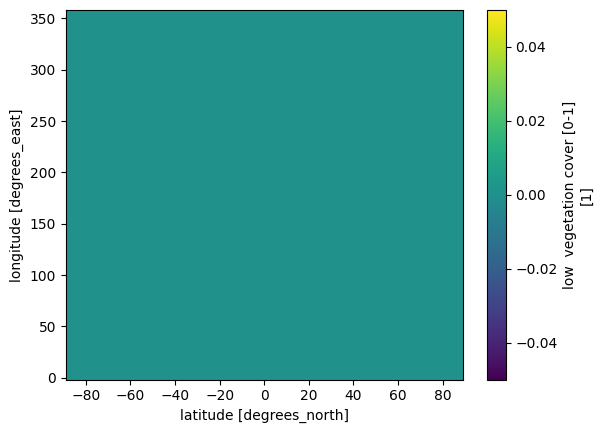

In [18]:
vegl_new.plot()

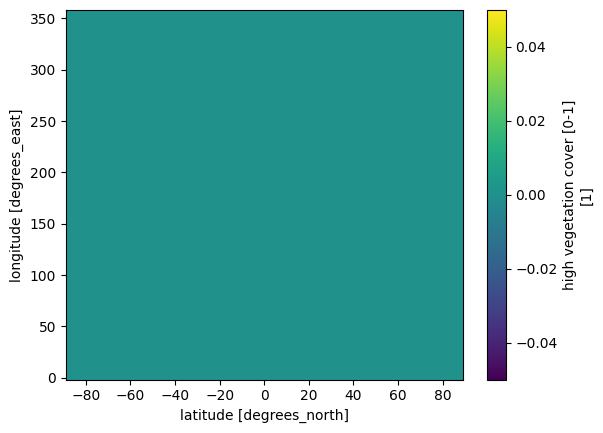

In [19]:
vegh_new.plot()

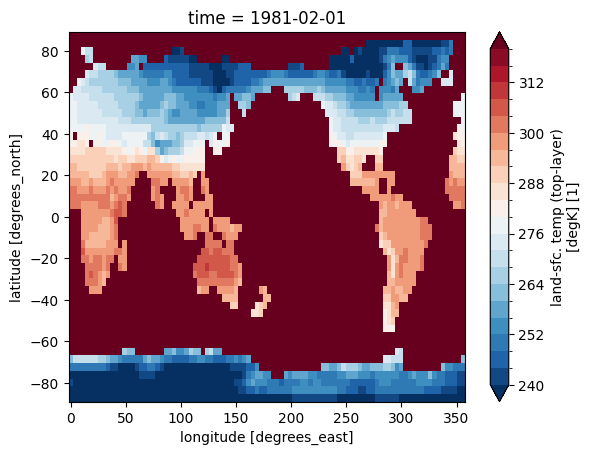

In [20]:
bc_land.stl[:,:,1].T.plot(levels=np.linspace(240,320,21), cmap=plt.cm.RdBu_r)

In [21]:
stl_new = bc_land.stl.copy()
stl_new[:,:,:] = np.nan
#stl_new[:,0:5,:] = 270.
#stl_new[:,-5:96,:] = 270.


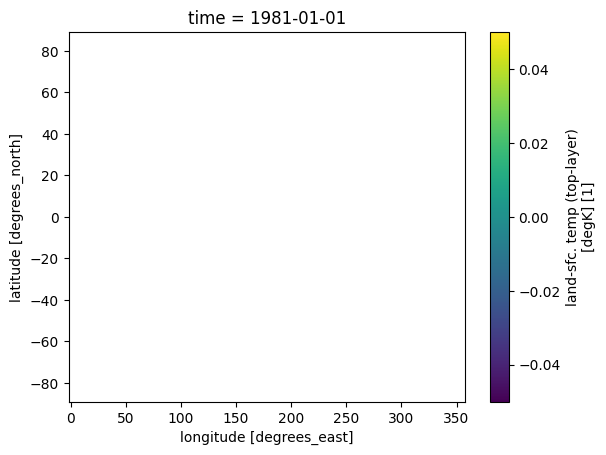

In [22]:
stl_new[:,:,0].T.plot()

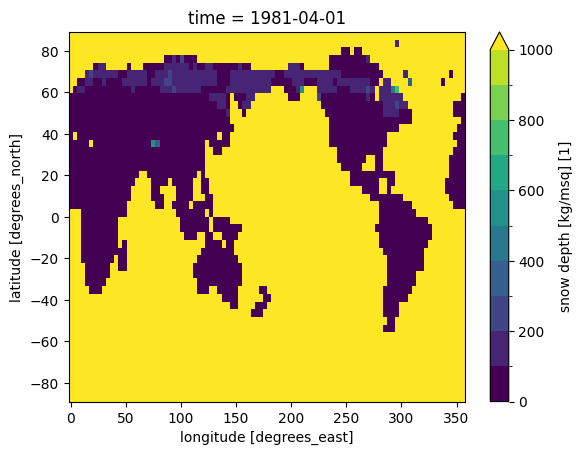

In [23]:
bc_land.snowd[:,:,3].T.plot(levels=np.linspace(0,1000,11)) # ocean is 1.e36 

In [24]:
snowd_new = bc_land.snowd.copy()
snowd_new[:,:,:] = 0.0
#snowd_new[:,0:5,:] = 500.
#snowd_new[:,-5:96,:] = 500.


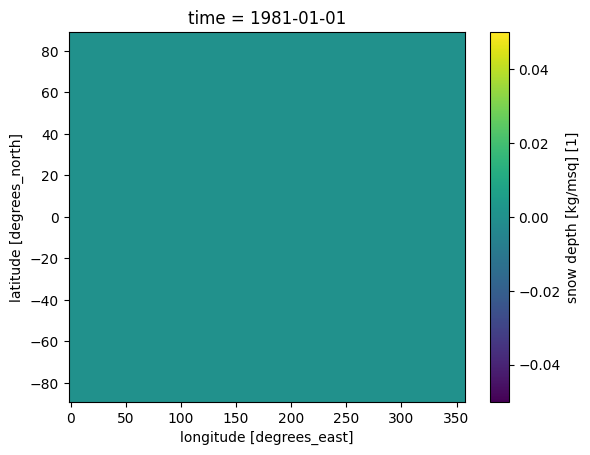

In [25]:
snowd_new[:,:,0].T.plot()

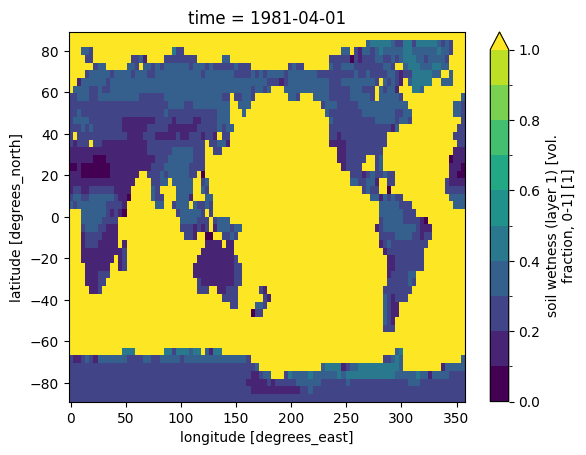

In [26]:
bc_land.swl1[:,:,3].T.plot(levels=np.linspace(0,1,11))

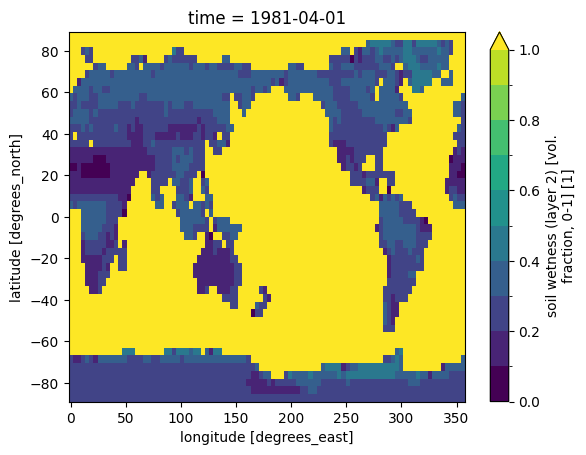

In [27]:
bc_land.swl2[:,:,3].T.plot(levels=np.linspace(0,1,11))

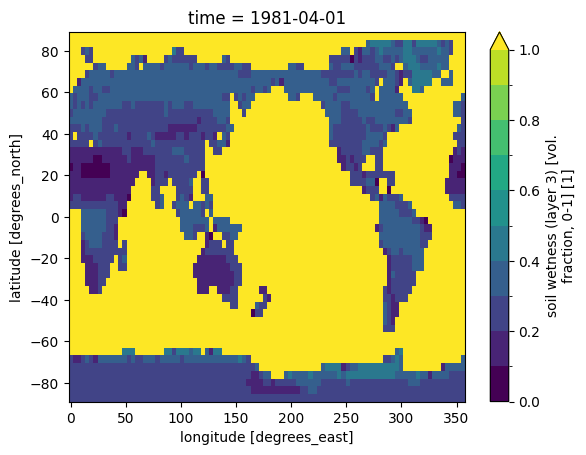

In [28]:
bc_land.swl3[:,:,3].T.plot(levels=np.linspace(0,1,11))

In [29]:
swl1_new = bc_land.swl1.copy()
swl1_new[:,:,:] = 0.0
swl2_new = bc_land.swl2.copy()
swl2_new[:,:,:] = 0.0
swl3_new = bc_land.swl3.copy()
swl3_new[:,:,:] = 0.0


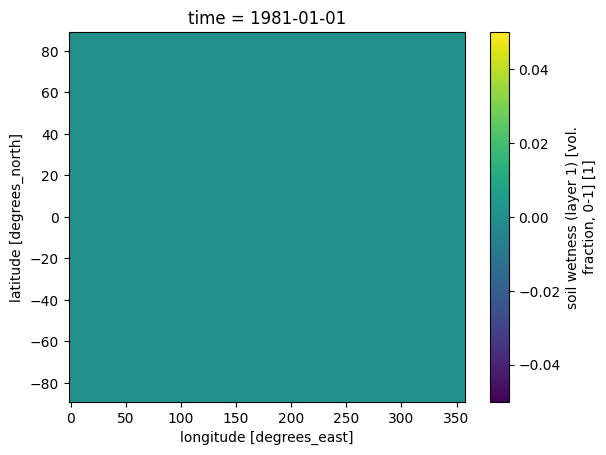

In [30]:
swl1_new[:,:,0].T.plot()

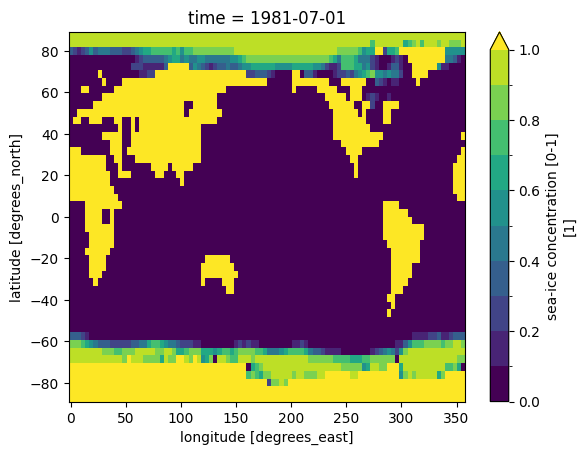

In [31]:
bc_land.icec[:,:,6].T.plot(levels=np.linspace(0,1,11))

In [32]:
icec_new = bc_land.icec.copy()
icec_new[:,:,:] = 0.0


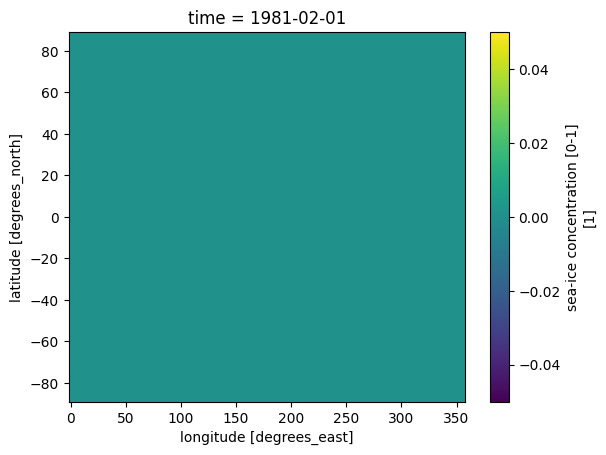

In [33]:
icec_new[:,:,1].T.plot()

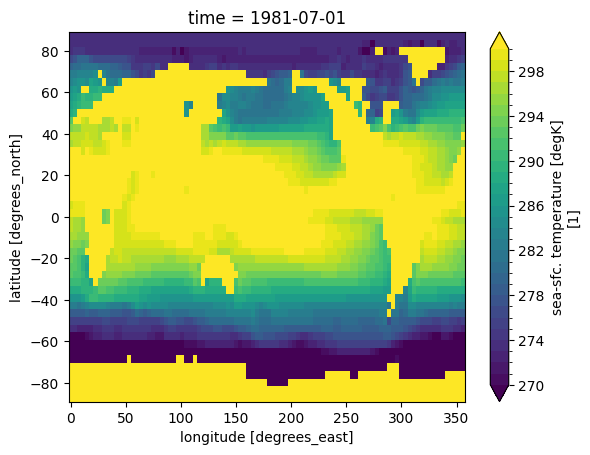

In [34]:
bc_land.sst[:,:,6].T.plot(levels=np.linspace(270,300,31))

In [35]:
sst_avg = bc_land.sst.mean(dim=('time')).mean(dim='lon')

/home/guido/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


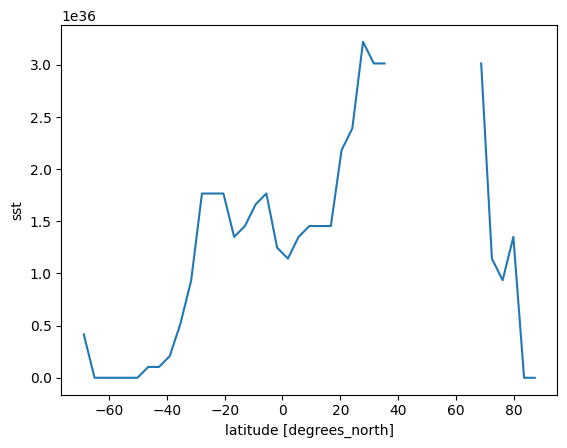

In [36]:
sst_avg.plot()

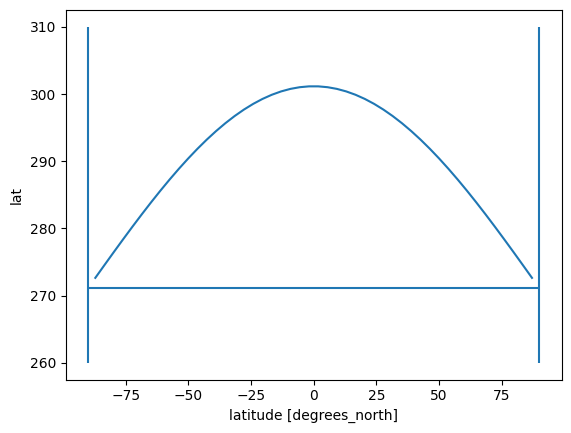

In [45]:
# make ssts go from 0 C to 30 C or 273 to 300 from pole to equator following cosine
lats = bc_land.lat
amp = 30.0
zsst = 271.15 + amp*np.cos(lats*np.pi/180.)
zsst.plot()
plt.vlines(-90,260,310)
plt.vlines(90,260,310)
plt.hlines(271.2,-90,90)

In [46]:
sst_new = bc_land.sst.copy()
for i in range(12):
    for j in range(len(lats)):
        sst_new[:,j,i] = zsst[j] 


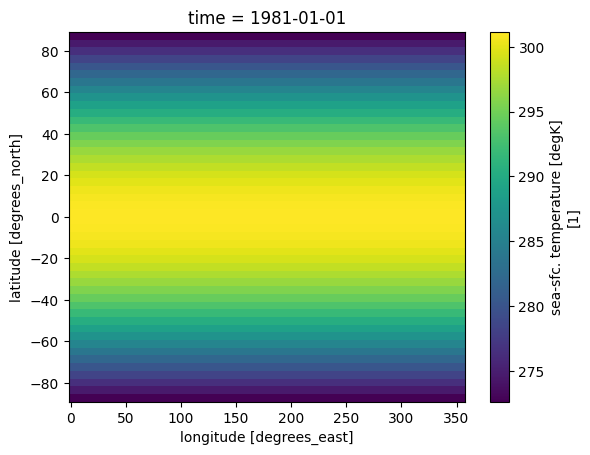

In [47]:
sst_new[:,:,0].T.plot()

In [48]:
# mask out the land in the SSTs
#sst_new[:,0:5,:] = np.nan
#sst_new[:,-5:96,:] = np.nan


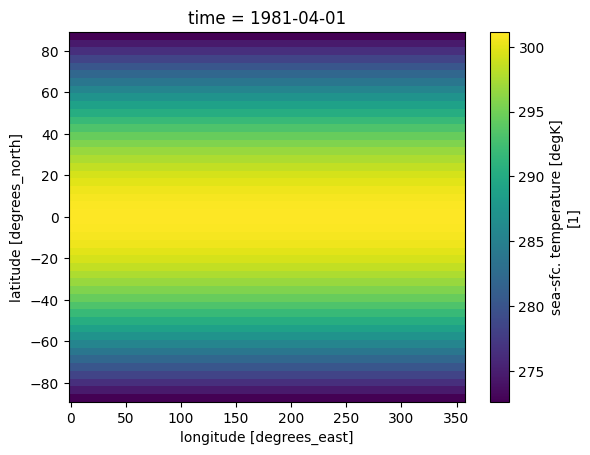

In [49]:
sst_new[:,:,3].T.plot()

In [50]:
271.2 - 273.15

-1.9499999999999886

In [51]:
wgts = np.cos(lats*np.pi/180.)
#wgts[0:5] = np.nan
#wgts[-5:96] = np.nan
normwgts = wgts/wgts.sum()
(sst_new[:,:,0]*normwgts[:]).mean(dim=("lon")).sum()

<xarray.DataArray ()>
array(294.70921473)
Coordinates:
    time     datetime64[ns] 1981-01-01

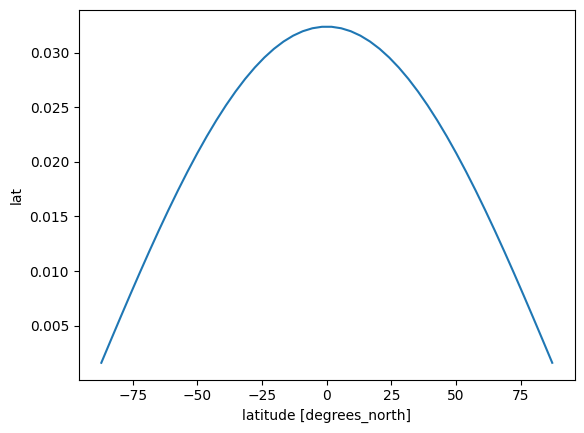

In [52]:
normwgts.plot()

In [53]:
normwgts.sum()

<xarray.DataArray 'lat' ()>
array(1.)

<xarray.DataArray 'sst' ()>
array(27.98433838)
Coordinates:
    time     datetime64[ns] 1981-01-01
<xarray.DataArray 'sst' ()>
array(-0.51325073)
Coordinates:
    time     datetime64[ns] 1981-01-01


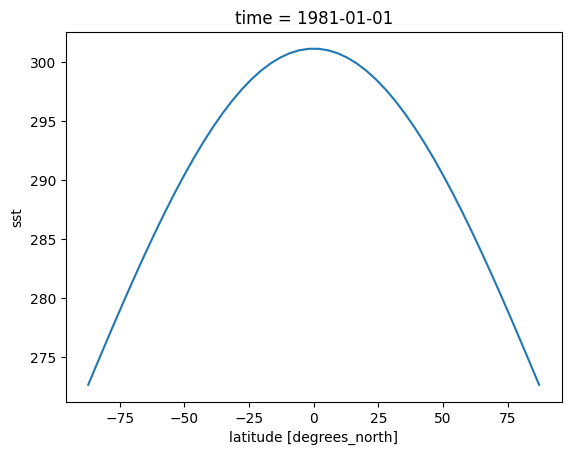

In [54]:
print(sst_new[:,:,0].mean(dim='lon').max()-273.15)
print(sst_new[:,:,0].mean(dim='lon').min()-273.15)
sst_new[:,:,0].mean(dim='lon').plot()

In [55]:
(sst_new[:,:,0].mean(dim='lon')*normwgts).sum(dim='lat')

<xarray.DataArray ()>
array(294.7091946)
Coordinates:
    time     datetime64[ns] 1981-01-01

In [56]:
# global mean SST in deg C
294.7 -273.15

21.55000000000001

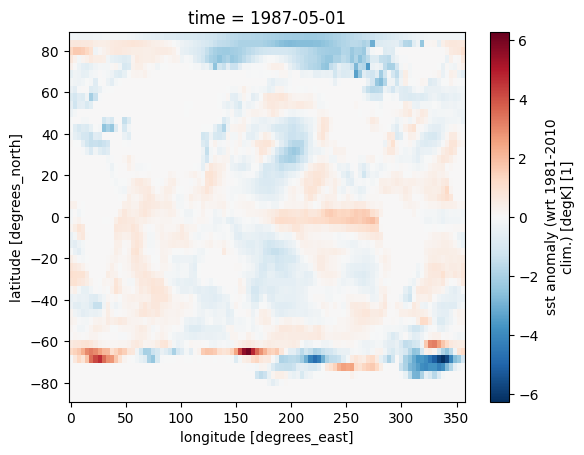

In [57]:
# we will just set the SST anomalies for the run == 0 to simplify with theory
bc_ssta.ssta[:,:,100].T.plot()

In [58]:
ssta_new = bc_ssta.ssta.copy()
ssta_new[:,:,:] = 0.0
#ssta_new[:,0:5,:] = np.nan
#ssta_new[:,-5:96,:] = np.nan


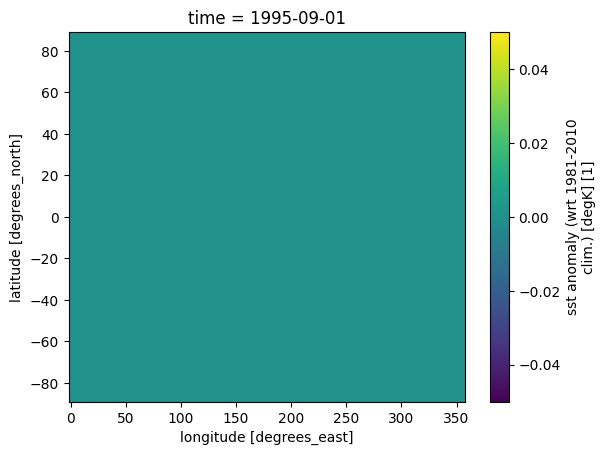

In [59]:
ssta_new[:,:,200].T.plot()

In [60]:
# now merge the new boundary conditions and save them 
new_bc_file = xr.merge([orog_new, lsm_new, vegh_new, alb_new, vegl_new, stl_new, snowd_new, swl1_new, swl2_new, swl3_new, icec_new, sst_new])


In [61]:
new_bc_file

<xarray.Dataset>
Dimensions:  (lat: 48, lon: 96, time: 12)
Coordinates:
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 1981-12-01
Data variables:
    orog     (lon, lat) float32 ...
    lsm      (lon, lat) float32 ...
    vegh     (lon, lat) float32 ...
    alb      (lon, lat) float32 ...
    vegl     (lon, lat) float32 ...
    stl      (lon, lat, time) float32 ...
    snowd    (lon, lat, time) float32 ...
    swl1     (lon, lat, time) float32 ...
    swl2     (lon, lat, time) float32 ...
    swl3     (lon, lat, time) float32 ...
    icec     (lon, lat, time) float32 ...
    sst      (lon, lat, time) float32 272.6 272.6 272.6 ... 272.6 272.6 272.6
Attributes:
    long_name:    orographic height [m]
    units:        1
    coordinates:  lev time

In [62]:
new_ssta_file = ssta_new.to_dataset()
new_ssta_file

<xarray.Dataset>
Dimensions:  (lat: 48, time: 420, lon: 96)
Coordinates:
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2013-12-01
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
Data variables:
    ssta     (lon, lat, time) float32 ...

In [64]:
new_bc_file.to_netcdf("bc/aqua_planet_bc.nc", engine='netcdf4')
new_ssta_file.to_netcdf("bc/aqua_planet_sst_anom.nc", engine='netcdf4')